In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [3]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [12]:
X=df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [13]:
y=df['Drug'].values
y[0:5]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY'], dtype=object)

In [14]:
# using label encoder to label it into int
from sklearn import preprocessing
lsex=preprocessing.LabelEncoder()
lsex.fit(['F','M'])
X[:,1] = lsex.transform(X[:,1])

lbp=preprocessing.LabelEncoder()
lbp.fit(['LOW','NORMAL','HIGH'])
X[:,2]=lbp.transform(X[:,2])

lChol = preprocessing.LabelEncoder()
lChol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = lChol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

# Setting Up Decision Tree


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)


Modelling

In [19]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [20]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

prediction


In [23]:
predTree=drugTree.predict(X_testset)

In [24]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


Evaluation

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


Visualization

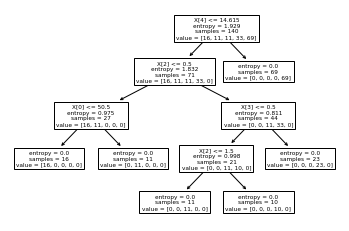

In [31]:
# plotting tree
tree.plot_tree(drugTree)
plt.show()